In [ ]:
import pandas as pd
import numpy as np
import math

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CS3237
# !ls

Mounted at /content/drive
/content/drive/My Drive/CS3237


In [ ]:
dataframe = pd.read_csv('data_all.csv')
dataframe = dataframe.drop(columns=dataframe.columns[0], axis=1)
print(dataframe)

       accX  accY  accZ  accResultant   gyrX   gyrY  gyrZ  isFall
0      0.00  0.03  1.00          1.00  -0.79   2.80 -0.16       1
1      0.00  0.03  0.99          0.99  -0.10  -1.07  0.11       1
2      0.00  0.03  1.02          1.02   0.10  -2.93  0.19       1
3      0.00  0.03  1.04          1.04  -0.10  -1.15  0.06       1
4      0.00  0.03  1.03          1.03  -0.52   0.75  0.00       1
...     ...   ...   ...           ...    ...    ...   ...     ...
28898  0.57  0.15  0.01          0.59  15.08 -73.88  5.09       6
28899  0.47  0.02  0.18          0.51  16.78 -87.59  4.49       6
28900  0.36  0.08  0.31          0.48  18.83 -90.90  4.35       6
28901  0.25  0.03  0.47          0.53  19.27 -93.91 -0.67       6
28902  0.16 -0.01  0.74          0.76  17.53 -87.02  1.42       6

[28903 rows x 8 columns]


In [ ]:
MODEL_NAME = 'mlp.hd5'
savemodel = ModelCheckpoint(MODEL_NAME)

In [ ]:
"""
Adjust these to control # of epochs, etc.
"""
batch_size = 1
look_back = 10
skip = 1
hidden_size = 128
num_epochs = 15
TRAIN_PERCENT = 0.7

# Set the random number seed so that we have reproducible results
# numpy.random.seed(7)

In [ ]:
# Generate the datasets with the given look_back.
def create_dataset(dataset, look_back=look_back):
    dataX, dataY= [], []

    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0:-1].flatten()
        dataX.append(a)
        dataY.append(dataset[i + look_back - 1, -1])
    return np.array(dataX), np.array(dataY)


In [ ]:
dataset = dataframe.to_numpy()
X, Y = create_dataset(dataset, look_back)
Y = Y.ravel()

scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

# save scaler
with open('scaler.pickle', 'wb') as f:
  pickle.dump(scaler, f)

trainX, testX, trainY, testY = train_test_split(X, Y, train_size=TRAIN_PERCENT)

In [ ]:
import os

def build_model(model_name):
  if os.path.exists(model_name):
      model = load_model(model_name)
  else:
      model = Sequential()
      model.add(Dense(32, activation='relu'))
      model.add(Dense(16, activation='relu'))
      model.add(Dense(8, activation='softmax'))
      model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(MODEL_NAME)

history = model.fit(trainX, trainY, epochs=100, validation_data=(testX, testY), callbacks=[savemodel])

Epoch 1/100
632/632 [==============================] - 5s 5ms/step - loss: 1.1978 - accuracy: 0.5518 - val_loss: 0.9797 - val_accuracy: 0.5744
Epoch 2/100
632/632 [==============================] - 3s 4ms/step - loss: 0.8902 - accuracy: 0.5805 - val_loss: 0.8120 - val_accuracy: 0.5892
Epoch 3/100
632/632 [==============================] - 3s 4ms/step - loss: 0.7793 - accuracy: 0.6152 - val_loss: 0.7318 - val_accuracy: 0.6592
Epoch 4/100
632/632 [==============================] - 3s 4ms/step - loss: 0.7353 - accuracy: 0.6441 - val_loss: 0.7600 - val_accuracy: 0.6106
Epoch 5/100
632/632 [==============================] - 3s 4ms/step - loss: 0.7082 - accuracy: 0.6619 - val_loss: 0.6821 - val_accuracy: 0.6855
Epoch 6/100
632/632 [==============================] - 3s 4ms/step - loss: 0.6941 - accuracy: 0.6748 - val_loss: 0.7111 - val_accuracy: 0.6504
Epoch 7/100
632/632 [==============================] - 2s 4ms/step - loss: 0.6823 - accuracy: 0.6864 - val_loss: 0.6712 - val_accuracy: 0.6871

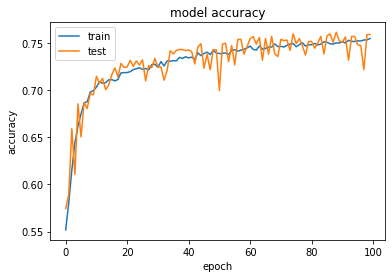

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()